In [233]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [235]:
# Remove NAs
# df.dropna(inplace=True)

# Remove outliers
Q1 = df['Global_Sales'].quantile(0.02)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

In [236]:
# Cria coluna com a região que mais vendeu
column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [238]:
target = 'User_Score'
numeric_features = [ 'Critic_Score', 'Critic_Count' ]

categorical_features = [
    'Genre',
    # 'Greatest',
    # 'Platform',
    # 'Publisher',
    # "Developer",
    # "Rating" 
]

In [239]:
df = df.dropna(subset=[target] + numeric_features)  # Drop rows where target or numeric columns are missing
df[categorical_features] = df[categorical_features].fillna('NA')  # Fill missing categorical values

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features )  
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

model = pipeline

In [241]:
df_f = df
df_f = df_f[ df["Global_Sales"] < 0.5 ]
df_f = df_f[ df["Global_Sales"] > 0.4 ]
df_f = df_f[ df["Greatest"] == "JP" ]

X = df_f[numeric_features + categorical_features]
y = df_f[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_466131/2351569939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f = df_f[ df["Global_Sales"] > 0.4 ]
/tmp/ipykernel_466131/2351569939.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f = df_f[ df["Greatest"] == "JP" ]


In [242]:
model.fit(X_train, y_train)

/home/wolke/Documents/datascience/topicos-4/.venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('regressor', LinearRegression())])

In [243]:
# Predict on the log scale
y_pred = model.predict(X_test)

In [244]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.5724213934099035
R-squared: -1.611808639132641


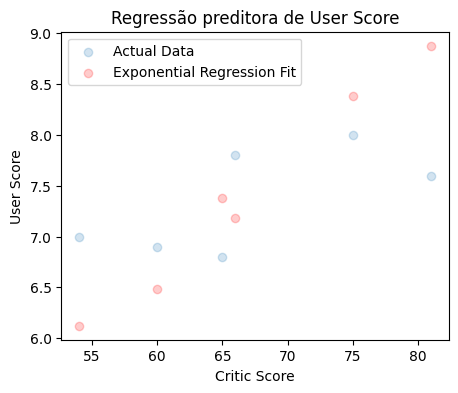

In [245]:
# Scatter plot of actual data
plt.figure(figsize=(5, 4))
plt.scatter(X_test['Critic_Score'], y_test, alpha=0.2, label='Actual Data')

# Plot the exponential regression line (prediction line)
plt.scatter(X_test["Critic_Score"], y_pred, color='red', alpha=0.2, label='Exponential Regression Fit')

# Labels and legend
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Regressão preditora de User Score')
plt.legend()
plt.show()